In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from tqdm import tqdm
from scipy.optimize import curve_fit #used for curve fitting
import random
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.transforms as mtransforms

plt.style.use('ggplot')

In [2]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


Circumfrence of the World:
41327.954 km

Radius: 6577 km

Reminder: Latitude is horizontal, longitude is vertical!

One latitude/longitude degree at equator: 114.799 km

Axis of rotation tilted by 26.32 deg on average

Northern Polar Circle at 66.14 degrees, 2738.78 km radius from the pole



Things that matter in VSOP theory:
Obliquity (axial tilt)
Eccentricity
Precession Index


# Obliquity

Obliquity, or axial tilt, is the inclination of the Earth's axis in relation to its plane of orbit around the Sun. Oscillations in the degree of Earth's axial tilt occur on a periodicity of 41,000 years from 21.5 to 24.5 degrees.
    -Indiana University, http://www.indiana.edu/~geol105/images/gaia_chapter_4/milankovitch.htm

Periodicity of Earth:
21.5 -> 24.5 -> 21.5 over 41000 years; 1 degree / 6833.33 years

Of Nuinen:
22.82 -> 29.82 -> 22.82 over 40000 years
avg 26.32

Average Obliquity:  24.32


Text(0.5, 1.0, 'Obliquity vs Time')

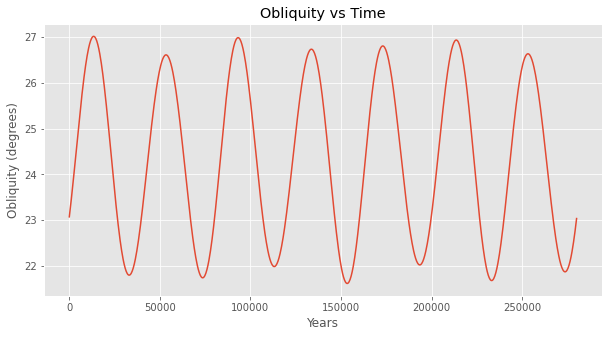

In [3]:
obliq_max = 26.82 #maximum axial tilt in degrees
obliq_min = 21.82 #minimum axial tilt in degrees
average_obliq = (obliq_max+obliq_min)/2
print("Average Obliquity: ", (obliq_max+obliq_min)/2)
obliq_lam = 40000 #in years
obliq_amp_base = (obliq_max-obliq_min)/2.0
obliq_frequency = 2*np.pi*(1/obliq_lam)
t = np.linspace(0,7*obliq_lam,1000)

#Over the sinusoidal major cycle of obliquity are numerous other, smaller amplitude, cycles.

#Amplitude of the obliquity is on a sinusoidal variation cycle as well,
amp_amp1 = 0.21
#amp_freq1 = 2*np.pi*(1/69000) #in cycles / year
amp_freq1 = 2*np.pi*(1/69000) #in cycles / year

#The amplitude of the sin wave varies over time,creating variability packets within the obliquity
obliq_amp = lambda t: amp_amp1*np.sin(amp_freq1*t)
obliquity = lambda t: (obliq_amp_base+obliq_amp(t))*np.sin(obliq_frequency*t+np.pi/3-10*np.pi/20)+(obliq_max+obliq_min)/2.0

plt.figure(figsize=[10,5])
plt.plot(t,obliquity(t))
plt.xlabel('Years')
plt.ylabel('Obliquity (degrees)')
plt.title('Obliquity vs Time')

# Eccentricity

The shape of the Earth's orbit varies between nearly circular (with the lowest eccentricity of 0.000055) and mildly elliptical (highest eccentricity of 0.0679). Its geometric or logarithmic mean is 0.0019. The major component of these variations occurs with a period of 413,000 years (eccentricity variation of ±0.012). Other components have 95,000-year and 125,000-year cycles (with a beat period of 400,000 years). They loosely combine into a 100,000-year cycle (variation of −0.03 to +0.02).
    -Laskar, J; Fienga, A.; Gastineau, M.; Manche, H (2011). "La2010: A New Orbital Solution for the Long-term Motion of the Earth". Astronomy & Astrophysics

Periodicity: 0.0055% eccentric to 6.79% eccentric cyclic over 100000 years. One extreme to the next in 50000 years; periodicity of 6.7845/50000

Eccentricity cycles:


Calibration: Right now, the Earth's eccentricity is approximitely 0.0167, or 1.67%. Thus, we need to shift the sine wave to start its 0th year point at 1.67. Mapped to radians, this ends up being a -0.5321 radian shift.

0.0008722591294661325 0.030836254532964708 0.052388161745748923


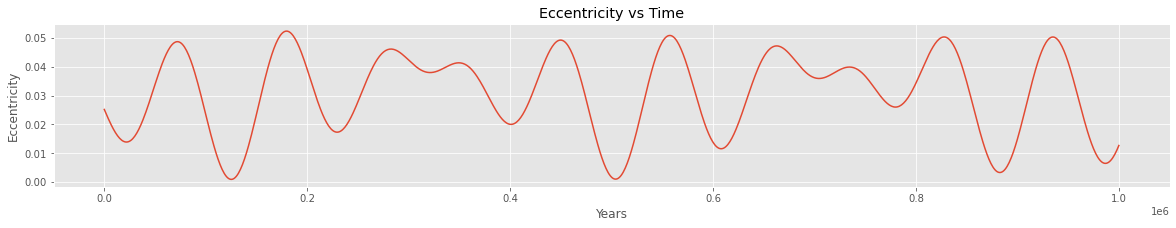

In [4]:
num_years = 1e6
t = np.linspace(0,num_years,1000)

divisor = 2
same_shift = 0
ecc_lam1 = 413000 #in years
ecc_frequency1 = 2*np.pi*(1/ecc_lam1)
ecc_amp1 = 0.013/divisor#(0.05-0.00005)/2
eccentricity1 = lambda t: ecc_amp1*np.sin(ecc_frequency1*t+(20*np.pi/20)-(same_shift*np.pi))

ecc_lam2 = 95000 #in years
ecc_frequency2 = 2*np.pi*(1/ecc_lam2)
ecc_amp2 = 0.025/divisor#(0.02-0.00003)/2
eccentricity2 = lambda t: ecc_amp2*np.sin(ecc_frequency2*t+(17*np.pi/20)-(same_shift*np.pi))

ecc_lam3 = 125000 #in years
ecc_frequency3 = 2*np.pi*(1/ecc_lam3)
ecc_amp3 = 0.025/divisor#(0.009-0.0002)/2
eccentricity3 = lambda t: ecc_amp3*np.sin(ecc_frequency3*t+(30*np.pi/20)-(same_shift*np.pi))

eccentricity = lambda t: np.abs(eccentricity1(t)+1*eccentricity2(t)+1*eccentricity3(t)+0.032) #+calibration

plt.figure(figsize=[20,3])
plt.plot(t,eccentricity(t))

#plt.axvline(80000)
plt.xlabel('Years')
plt.ylabel('Eccentricity')
plt.title('Eccentricity vs Time')

min_ecc = np.min(eccentricity(t))
average_ecc = np.mean(eccentricity(t))
max_ecc = np.max(eccentricity(t))
print(min_ecc,average_ecc,max_ecc)

# Axial Precession

Axial precession is the trend in the direction of the Earth's axis of rotation relative to the sun, with a period of 25,771.5 years.

Periodicity: One precession every 25771.5 years; half-precession in 12885.25 years. Thus, the Earth's axial precession brings it from one extreme to the other in 12885.25 years.

Mapping: This sine wave is mapped between -1.00 and 1.00, where 1.00 represents the year at which the north pole is pointed closest to the sun while at perhelion. -1 represents the year at which the south pole is pointed closest to the sun at perhelion.

-0.9999999830978568 0.018633053168521586 0.9999905228456341


Text(0.5, 1.0, 'Precession vs Time')

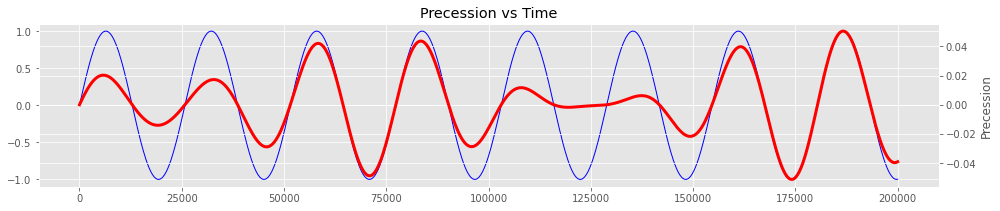

In [5]:
prec_max = 1 #the north pole is closest to the sun
prec_min = -1 #the south pole is closest to the sun
prec_lam = 25771.5 #in years
prec_amp_base = (prec_max-prec_min)/2.0
prec_frequency = 2*np.pi*(1/prec_lam)
t = np.linspace(0,200000,1000)

#Amplitude of the obliquity is on a sinusoidal variation cycle as well,
#rate_frequency = 2*np.pi*(1/(2e4))
#magnitude_of_precession_rate = 2 #arcseconds in eithe r direction, centered around average of 50 arcseconds
#precession_of_rate = lambda t: ((0.5*np.sin((rate_frequency/(2.5))*t)+2)*np.sin(rate_frequency*t)+50)/50

#prec_frequency = lambda t: precession_of_rate(t)*(2*np.pi*(1/prec_lam))
#precession = lambda t: (prec_amp_base)*np.sin(prec_frequency(t)*t+np.pi/20)
#precession = lambda t: (prec_amp_base/3.0)*(np.sin((2*np.pi*(1/25000))*t+np.pi/20)+np.sin((2*np.pi*(1/19000))*t+np.pi/20)+np.sin((2*np.pi*(1/22000))*t+np.pi/20))

precession = lambda t: prec_amp_base*(np.sin((2*np.pi*(1/prec_lam))*t))
precession_index = lambda t: eccentricity(t)*prec_amp_base*(np.sin((2*np.pi*(1/prec_lam))*t))

average_prec = np.mean(precession(t))
max_prec = np.max(precession(t))
min_prec = np.min(precession(t))
print(min_prec,average_prec,max_prec)

fig, prec = plt.subplots(figsize=[20,3])
fig.subplots_adjust(right=0.75)

prec_index = prec.twinx()
#make_patch_spines_invisible(prec_index)

# Second, show the right spine.
prec_index.spines["right"].set_visible(True)

p1, = prec.plot(t,precession(t), "b-", label="Precession", linewidth='1')
p2, = prec_index.plot(t,precession_index(t), "r-", label="Precession Index", linewidth='3')

#plt.figure(figsize=[10,5])
#plt.plot(t,precession(t))
plt.xlabel('Years')
plt.ylabel('Precession')
plt.title('Precession vs Time')

# Obliquity:
function: obliquity(t)

A measure of the axial tilt of the planet, in degrees. The higher the obliquity, the more severe the seasons.

# Precession:
precession(t)

A measure of which pole is closer to the sun. Peaks signify that the north pole is pointing towards the sun at perihelion, and troughs
mean that the south pole is pointing towards the sun at perihelion.

# Eccentricity:
eccentricity(t)

A measure of how oblong the orbit is. The higher the eccentricity, the greater the temperature difference between summer and winter, and the length of the seasons.

-----------------------------------------------

In [6]:
num_years = 1e5
jump = 2000
t = np.linspace(0,num_years, int(num_years/jump) ,endpoint=False)
index = 0

obliq_dev = (obliq_max-obliq_min)/4
high_obliq = average_obliq+obliq_dev
low_obliq = average_obliq-obliq_dev
previous_obliq = 0

ecc_dev = (max_ecc-min_ecc)/4
high_ecc = average_ecc+ecc_dev
low_ecc = average_ecc-ecc_dev
previous_ecc = 0

prec_dev = (max_prec-min_prec)/4
north_prec = average_prec+prec_dev
south_prec = average_prec-prec_dev
previous_prec = 0

#Build array labels
obliq_labels = []
prec_labels = []

for obliq in obliquity(t):

    if obliq >= high_obliq: #obliquity 1/3 from maximum
        if obliq > previous_obliq:
            obliq_labels.append([np.round(100000-t[index],0),"High Obliquity, increasing",np.round(obliq,1)])
        else:
            obliq_labels.append([np.round(100000-t[index],0),"High Obliquity, decreasing",np.round(obliq,1)])
            
    elif obliq > low_obliq and obliq < high_obliq:
        if obliq > previous_obliq:
            obliq_labels.append([np.round(100000-t[index],0),"Mid Obliquity, increasing",np.round(obliq,1)])
        else:
            obliq_labels.append([np.round(100000-t[index],0),"Mid Obliquity, decreasing",np.round(obliq,1)])
            
    elif obliq <= low_obliq: #obliquity 1/3 from minimum
        if obliq > previous_obliq:
            obliq_labels.append([np.round(100000-t[index],0),"Low Obliquity, increasing",np.round(obliq,1)])
        else:
            obliq_labels.append([np.round(100000-t[index],0),"Low Obliquity, decreasing",np.round(obliq,1)])
    #else:
    #    print("pop!",obliq)
    
    previous_obliq = obliq
    index += 1

index=0
for prec in precession(t):

    if eccentricity(t[index]) > high_ecc: #High eccentricity means precession matters!
        if prec > north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Strong North Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Strong North Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec > south_prec and prec < north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Strong Equal Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Strong Equal Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec < south_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Strong South Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Strong South Precession, decreasing",np.round(precession_index(t[index]),3)])
            
    if eccentricity(t[index]) > low_ecc and eccentricity(t[index]) < high_ecc:
        if prec > north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Mid North Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Mid North Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec > south_prec and prec < north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Mid Equal Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Mid Equal Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec < south_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Mid South Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Mid South Precession, decreasing",np.round(precession_index(t[index]),3)])

    if eccentricity(t[index]) < low_ecc: #eccentricity 1/3 from minimum
        if prec > north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Weak North Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Weak North Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec > south_prec and prec < north_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Weak Equal Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Weak Equal Precession, decreasing",np.round(precession_index(t[index]),3)])
        
        if prec < south_prec:
            if prec > previous_prec:
                prec_labels.append([np.round(100000-t[index],0),"Weak South Precession, increasing",np.round(precession_index(t[index]),3)])
            else:
                prec_labels.append([np.round(100000-t[index],0),"Weak South Precession, decreasing",np.round(precession_index(t[index]),3)])

        
    previous_ecc = eccentricity(t[index])
    previous_prec = prec
    index += 1

In [7]:
print("Minimum obliquity: \t",obliq_min)
print("Low    obliquity: \t",low_obliq)
print("Average obliquity: \t",average_obliq)
print("High obliquity: \t",high_obliq)
print("Maximum obliquity: \t",obliq_max)

print("\nMinimum eccentricity: \t",min_ecc)
print("Low eccentricity: \t",low_ecc)
print("Average eccentricity: \t",average_ecc)
print("High eccentricity: \t",high_ecc)
print("Maximum eccentricity: \t",max_ecc)

print("\nMinimum precession: \t",min_prec)
print("South precession: \t",south_prec)
print("Equal precession: \t",average_prec)
print("North precession: \t",north_prec)
print("Maximum precession: \t",max_prec)

Minimum obliquity: 	 21.82
Low    obliquity: 	 23.07
Average obliquity: 	 24.32
High obliquity: 	 25.57
Maximum obliquity: 	 26.82

Minimum eccentricity: 	 0.0008722591294661325
Low eccentricity: 	 0.01795727887889401
Average eccentricity: 	 0.030836254532964708
High eccentricity: 	 0.04371523018703541
Maximum eccentricity: 	 0.052388161745748923

Minimum precession: 	 -0.9999999830978568
South precession: 	 -0.4813645733173511
Equal precession: 	 0.018633053168521586
North precession: 	 0.5186306796543942
Maximum precession: 	 0.9999905228456341


In [8]:
years = [item[0] for item in prec_labels]
precession_states = [item[1] for item in prec_labels]
precession_vals = [item[2] for item in prec_labels]

obliq_states = [item[1] for item in obliq_labels]
obliq_vals = [item[2] for item in obliq_labels]

for i in range(0,len(years)):
    print("Year BBT: ",years[i]," State: ",precession_states[i]," ",obliq_states[i]," of ",obliq_vals[i])

Year BBT:  100000.0  State:  Mid Equal Precession, decreasing   Low Obliquity, increasing  of  23.1
Year BBT:  98000.0  State:  Mid Equal Precession, increasing   Mid Obliquity, increasing  of  23.8
Year BBT:  96000.0  State:  Mid North Precession, increasing   Mid Obliquity, increasing  of  24.6
Year BBT:  94000.0  State:  Mid North Precession, increasing   Mid Obliquity, increasing  of  25.4
Year BBT:  92000.0  State:  Mid North Precession, decreasing   High Obliquity, increasing  of  26.1
Year BBT:  90000.0  State:  Weak North Precession, decreasing   High Obliquity, increasing  of  26.6
Year BBT:  88000.0  State:  Weak Equal Precession, decreasing   High Obliquity, increasing  of  26.9
Year BBT:  86000.0  State:  Weak Equal Precession, decreasing   High Obliquity, increasing  of  27.0
Year BBT:  84000.0  State:  Weak South Precession, decreasing   High Obliquity, decreasing  of  26.8
Year BBT:  82000.0  State:  Weak South Precession, decreasing   High Obliquity, decreasing  of  26.

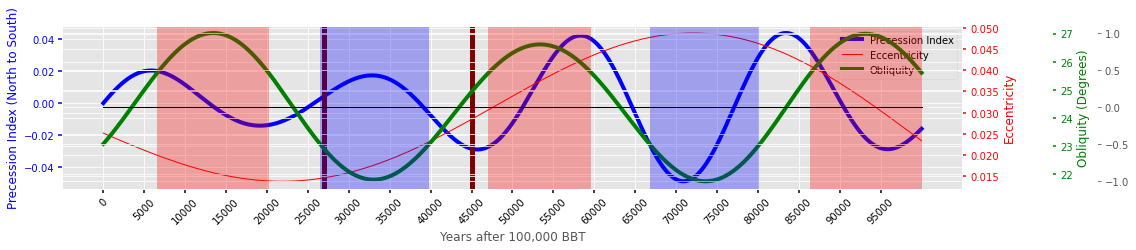

In [9]:
#t = np.linspace(0,1e5,1000)
t = np.linspace(1e5,0,1000)
t_plot = np.linspace(1e5,0,1000)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, precession_line = plt.subplots(figsize=[20,3])
fig.subplots_adjust(right=0.75)

eccentricity_line = precession_line.twinx()
obliquity_line = precession_line.twinx()
filling_line = precession_line.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
obliquity_line.spines["right"].set_position(("axes", 1.1))
filling_line.spines["right"].set_position(("axes", 1.15))

# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(obliquity_line)

# Second, show the right spine.
obliquity_line.spines["right"].set_visible(True)

p1, = precession_line.plot(t,precession_index(t), "b-", label="Precession Index", linewidth='4')
p2, = eccentricity_line.plot(t,eccentricity(t), "r-", label="Eccentricity", linewidth='1')
p3, = obliquity_line.plot(t,obliquity(t), "g-", label="Obliquity", linewidth='4')
p4, = filling_line.plot(t,np.zeros(len(t)), "k-",linewidth='1' )

trans_precession = mtransforms.blended_transform_factory(precession_line.transData, precession_line.transAxes)
trans_eccentricity = mtransforms.blended_transform_factory(eccentricity_line.transData, eccentricity_line.transAxes)
trans_obliquity = mtransforms.blended_transform_factory(obliquity_line.transData, obliquity_line.transAxes)

precession_line.set_xlabel("Years after 100,000 BBT")
precession_line.set_ylabel("Precession Index (North to South)")
eccentricity_line.set_ylabel("Eccentricity")
obliquity_line.set_ylabel("Obliquity (Degrees)")

precession_line.yaxis.label.set_color(p1.get_color())
eccentricity_line.yaxis.label.set_color(p2.get_color())
obliquity_line.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
precession_line.tick_params(axis='y', colors=p1.get_color(), **tkw)
eccentricity_line.tick_params(axis='y', colors=p2.get_color(), **tkw)
obliquity_line.tick_params(axis='y', colors=p3.get_color(), **tkw)
precession_line.tick_params(axis='x',colors='k', **tkw)

lines = [p1, p2, p3]
precession_line.legend(lines, [l.get_label() for l in lines])

#Fill in the area of NORTHERN precession.
# theta_precession_north = 0.5
# precession_line.fill_between(t, min(precession(t)),max(precession(t)), 
#                              where = precession(t) > theta_precession_north, 
#                              facecolor='grey', alpha=0.25, transform=trans_precession)

#Fill in the area of SOUTHERN precession.
# theta_precession_south = -0.5
# precession_line.fill_between(t, min(precession(t)), max(precession(t)), 
#                              where = precession(t) < theta_precession_south, 
#                              facecolor='grey', alpha=0.25, transform=trans_precession)

#Fill in the area of HIGH eccentricity
# theta_eccentricity_high = 0.03
# filling_line.fill_between(t, -1, 1, 
#                              where = eccentricity(t) > theta_eccentricity_high, 
#                              facecolor='cyan', alpha=0.25, transform=trans_eccentricity)

# #Fill in the area of LOW eccentricity, or regions indicating possible periods of warmth
# theta_eccentricity_low = 0.015
# precession_line.fill_between(t, min(precession(t)), max(precession(t)), 
#                              where = eccentricity(t) < theta_eccentricity_low, 
#                              facecolor='red', alpha=0.15, transform=trans_obliquity)

#Fill in the area of HIGH obliquity, indicating more extreme seasons and a typically high temperature at high latitudes
theta_obliquity_high = high_obliq
filling_line.fill_between(t, -1, 1, 
                             where = obliquity(t) > theta_obliquity_high, 
                             facecolor='red', alpha=0.3, transform=trans_obliquity)

# #Fill in the area of LOW obliquity, indicating less extreme seasons and a lower temperature at high latitudes
theta_obliquity_low = low_obliq
filling_line.fill_between(t, -1, 1, 
                             where = obliquity(t) < theta_obliquity_low, 
                             facecolor='blue', alpha=0.3, transform=trans_obliquity)
#####################
#Add Timeline aspects
#precession_line.axvline(10000,color='gold',linewidth='5')
#90000 BBT: Waith migrate from Iniva during the following period of stability.

Usada_date = 73000
sub = max(t)
precession_line.axvline(sub-Usada_date,color='maroon',linewidth='5')
#73000 BBT: Usada begins

precession_line.axvline(sub-54920,color='maroon',linewidth='5')
#54920 BBT: Usada ends

#precession_line.axvline(max(t)-20000,color='gold',linewidth='5')
#~20000 BBT: Coming of Men

#precession_line.axvline(max(t)+1600,color='grey',linewidth='5')
#1600 ABT: The events of Beneath it All


xticks = np.arange(min(t), max(t), step= (5000))
xticks = xticks
plt.xticks(xticks[::-1])
plt.setp(precession_line.xaxis.get_majorticklabels(), rotation=45)
#precession_line.set_xticks(xticks)
#precession_line.set_xticklabels(xticks[::-1])

#plt.gca().invert_xaxis()

plt.show()

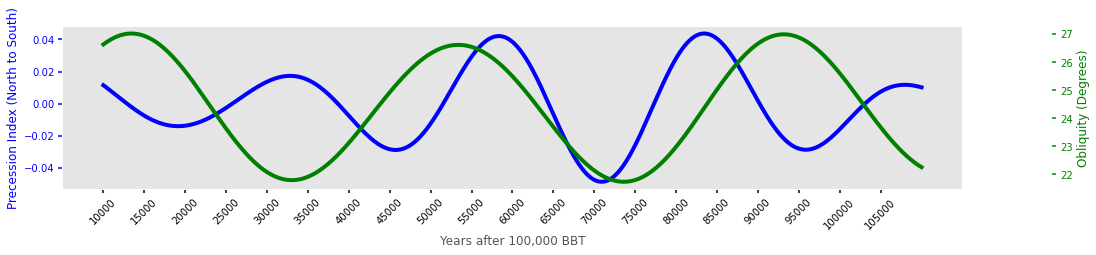

In [10]:
#t = np.linspace(0,1e5,1000)
t = np.linspace(1.1e5,10000,1000)
t_plot = np.linspace(1.1e5,10000,1000)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(False)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, precession_line = plt.subplots(figsize=[20,3])
fig.subplots_adjust(right=0.75)

#eccentricity_line = precession_line.twinx()
obliquity_line = precession_line.twinx()
#filling_line = precession_line.twinx()

precession_line.grid(False)
obliquity_line.grid(False)

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
obliquity_line.spines["right"].set_position(("axes", 1.1))
#filling_line.spines["right"].set_position(("axes", 1.15))

# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(obliquity_line)

# Second, show the right spine.
obliquity_line.spines["right"].set_visible(True)

p1, = precession_line.plot(t,precession_index(t), "b-", label="Precession Index", linewidth='4')
#p2, = eccentricity_line.plot(t,eccentricity(t), "r-", label="Eccentricity", linewidth='1')
p3, = obliquity_line.plot(t,obliquity(t), "g-", label="Obliquity", linewidth='4')
#p4, = filling_line.plot(t,np.zeros(len(t)), "k-",linewidth='1' )

trans_precession = mtransforms.blended_transform_factory(precession_line.transData, precession_line.transAxes)
#trans_eccentricity = mtransforms.blended_transform_factory(eccentricity_line.transData, eccentricity_line.transAxes)
trans_obliquity = mtransforms.blended_transform_factory(obliquity_line.transData, obliquity_line.transAxes)

precession_line.set_xlabel("Years after 100,000 BBT")
precession_line.set_ylabel("Precession Index (North to South)")
#eccentricity_line.set_ylabel("Eccentricity")
obliquity_line.set_ylabel("Obliquity (Degrees)")

precession_line.yaxis.label.set_color(p1.get_color())
#eccentricity_line.yaxis.label.set_color(p2.get_color())
obliquity_line.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
precession_line.tick_params(axis='y', colors=p1.get_color(), **tkw)
#eccentricity_line.tick_params(axis='y', colors=p2.get_color(), **tkw)
obliquity_line.tick_params(axis='y', colors=p3.get_color(), **tkw)
precession_line.tick_params(axis='x',colors='k', **tkw)

#lines = [p1, p2, p3]
#precession_line.legend(lines, [l.get_label() for l in lines])

theta_obliquity_high = high_obliq
# filling_line.fill_between(t, -1, 1, 
#                              where = obliquity(t) > theta_obliquity_high, 
#                              facecolor='red', alpha=0.3, transform=trans_obliquity)

# #Fill in the area of LOW obliquity, indicating less extreme seasons and a lower temperature at high latitudes
theta_obliquity_low = low_obliq
# filling_line.fill_between(t, -1, 1, 
#                              where = obliquity(t) < theta_obliquity_low, 
#                              facecolor='blue', alpha=0.3, transform=trans_obliquity)

Usada_date = 73000
sub = max(t)
#precession_line.axvline(sub-Usada_date,color='maroon',linewidth='5')

#precession_line.axvline(sub-54920,color='maroon',linewidth='5')


xticks = np.arange(min(t), max(t), step= (5000))
xticks = xticks
plt.xticks(xticks[::-1])
plt.setp(precession_line.xaxis.get_majorticklabels(), rotation=45)
#precession_line.set_xticks(xticks)
#precession_line.set_xticklabels(xticks[::-1])

#plt.gca().invert_xaxis()

plt.show()

In [12]:
print(obliquity(100000 - 25000))
print(eccentricity(100000 - 25000))
print(precession(100000 - 25000))
print(180+np.arcsin(precession(100000 - 25000))*180/np.pi)

21.799790727461783
0.04839372012149188
-0.5348105365762358
147.66893661602933


# Insolation and Temperature

In [12]:
#CONVERTER FUNCTIONS
CtoF = lambda T: (T*(9/5))+32 #converter function: C to F
KtoC = lambda T: T-273.15 #converter function: K to C
KtoF = lambda T: CtoF(KtoC(T))

#CONSTANTS
Ks = 1366 #average insolation from the star in watts / m^2
I0 = Ks/4.0 #average insolation of earth's upper atmosphere, only around 198 reach Earth's surface
A_ice = 0.6
A_hot = 0.3
A_avg = 0.35#(A_ice+A_hot)/2 #average albedo
t = np.linspace(0,1e5,1000)

#gamma = 5
gamma_ng = 9 #gamma for non glacial period
gamma_pseudo_g = 2 #weaker glacial period
gamma_g = 0.1 #gamma for usada period, corresponding to a glacial period brought on by ubiquitious dust in the atmosphere

sigma = 5.67e-8 #Steffan Boltzmann constant; Watt / (meter^2 K^4)
rads = (np.pi/180)#converter: degrees to radians by multiplication

#Define the latitude space and the sin of the latitude
latitude_d = np.linspace(-90,90,1000)
latitude_r = latitude_d*rads
latitude_sr = np.sin(latitude_r)

In [13]:
#INSOLATION AND TEMPERATURE FUNCTIONS

#Using the approximation by Alice Nadeau and Richard McGehee in their paper on the subject,
#lay out the necessary Legendre polynomials p2-6
p2 = lambda x: (3*(x**2)-1)/2
p4 = lambda x: (35*(x**4)-30*(x**2) + 3)/8
p6 = lambda x: (231*(x**6)-315*(x**4) + 105*(x**2) - 5)/16
#this is the insolation as a function of latitude and obliquity; y is sin of latitude, beta is obliquity in degrees
#s(lat,obliq)
s = lambda y,beta: 1-(5/8)*p2(np.cos(rads*beta))*p2(np.sin(y))-(9/64)*p4(np.cos(rads*beta))*p4(np.sin(y))-(65/1024)*p6(np.cos(rads*beta))*p6(np.sin(y))

#from numerous sources, the insolation variation caused by changes in eccentricity is:
#Ins_ecc(t)
ins_ecc = lambda t: 1/np.sqrt(1-eccentricity(t)**2) #Insolation factor from eccentricity


ratio = 0
#this is the average insolation according to Nadeau and McGehee, taking into account the eccentricity and obliquity.
#Ibar(t,lat)
if ratio == 0:
    Ibar = lambda t,latitude_r: I0*ins_ecc(t)*s(latitude_r,obliquity(t))
else:
    Ibar = lambda t,latitude_r: ins_ecc(t)*s(latitude_r,obliquity(t))

#From SciED UCAR website.
adjust = 34
if ratio == 0:
    temp_0D = lambda insolation: 54+((insolation/I0)*Ks*(1-A_avg)/(4*sigma))**(1/4) #gives temperature in K with a zero dimensional approach
else:
    temp_0D = lambda insolation: ((insolation)*Ks*(1-A_avg)/(4*sigma))**(1/4) #gives temperature in K with a zero dimensional approach
#From John Baez blog, UCR
A_T = lambda T,gamma: ((1-A_ice)+((1-A_hot)-(1-A_ice))*(1+np.tanh(gamma*rads*(KtoC(T))))/2) #change the albedo with the temperature; lower temps give higher albedo
if ratio == 0:
    temp_from_insolation = lambda insolation,T,gamma: adjust+((insolation/I0)*Ks*(A_T(T,gamma))/(4*sigma))**(1/4) #gives temperature in K, taking albedo changes due to ice into account
else:
    temp_from_insolation = lambda insolation,T,gamma: ((insolation)*Ks*(1-A_T(T,gamma))/(4*sigma))**(1/4) #gives temperature in K, taking albedo changes due to ice into account

#print(KtoC(temp_0D(Ibar(t,latitude_r))) )

## Visualizing the differences

Temperature at 65 lat, min obliquity:  -4.231350038665518
Temperature at 65 lat, max obliquity:  13.173869718374352
Temperature at 65 lat, present:  9.152343080051264

 Temperature falls drastically because of the Usada.
Temperature at 65 lat, min obliquity Usada:  -14.920867849949644

 Temperature during the Usada comparisons:
Temperature at 65 lat, difference present vs Usada:  -24.073210930000908

 Temperature after the Usada rises significantly:
Temperature at 65 lat, difference Usada vs max:  28.094737568323996

 Temperature at 65 lat, difference present vs max:  4.021526638323088

 Temperature eventually cools and brings another glacial period:
Temperature at 65 lat, difference present vs min:  -13.383693118716781


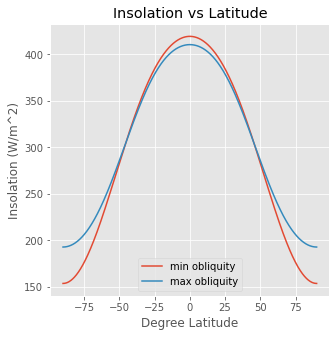

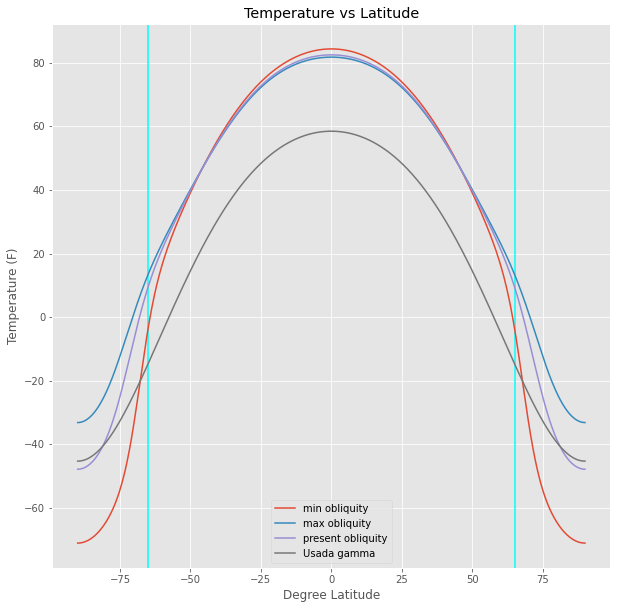

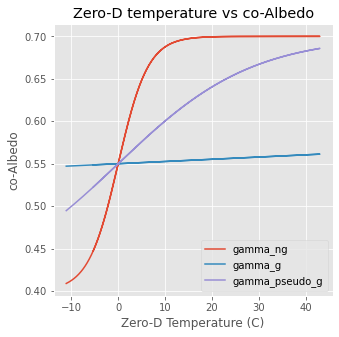

In [14]:
#Create a plot of Insolation vs Lat
max_indices = np.where(obliquity(t) == np.amax(obliquity(t)))
min_indices = np.where(obliquity(t) == np.amin(obliquity(t)))
plt.figure(figsize=[5,5])
plt.plot(latitude_d,Ibar(t[min_indices[0]],latitude_r),label='min obliquity')
plt.plot(latitude_d,Ibar(t[max_indices[0]],latitude_r),label="max obliquity")
plt.xlabel('Degree Latitude')
plt.ylabel('Insolation (W/m^2)')
plt.title('Insolation vs Latitude')
plt.legend(loc='best')

#Create a plot of Temperature vs Lat
plt.figure(figsize=[10,10])
plt.axvline(65,color='cyan')
plt.axvline(-65,color='cyan')
ind_of_65 = np.where(latitude_d > 65)
ind_of_n65 = np.where(latitude_d > -65)

temp_at_min_ob = CtoF(KtoC(temp_from_insolation(Ibar(t[min_indices[0]],latitude_r),temp_0D(Ibar(t[min_indices[0]],latitude_r)),gamma_ng)))
temp_at_max_ob = CtoF(KtoC(temp_from_insolation(Ibar(t[max_indices[0]],latitude_r),temp_0D(Ibar(t[max_indices[0]],latitude_r)),gamma_ng)))
temp_at_present = CtoF(KtoC(temp_from_insolation(Ibar(t[-1],latitude_r),temp_0D(Ibar(t[-1],latitude_r)),gamma_ng)))
temp_at_min_ob_glacial = CtoF(KtoC(temp_from_insolation(Ibar(t[min_indices[0]],latitude_r),
                                                        temp_0D(Ibar(t[min_indices[0]],latitude_r)),gamma_g)))

print("Temperature at 65 lat, min obliquity: ",temp_at_min_ob[ind_of_65[0][0]])
print("Temperature at 65 lat, max obliquity: ",temp_at_max_ob[ind_of_65[0][0]])
#print("Temperature at 65 lat, difference min vs max: ",
#      temp_at_min_ob[ind_of_65[0][0]]-temp_at_max_ob[ind_of_65[0][0]])
print("Temperature at 65 lat, present: ",temp_at_present[ind_of_65[0][0]])


#First major event: Usada blocks the sky with storms and dust, cooling globe and creating milder latitudinal changes
print("\n Temperature falls drastically because of the Usada.")
print("Temperature at 65 lat, min obliquity Usada: ",
      temp_at_min_ob_glacial[ind_of_65[0][0]])
#Comparison of temperatures during Usada max and present
print("\n Temperature during the Usada comparisons:")
print("Temperature at 65 lat, difference present vs Usada: ",
      temp_at_min_ob_glacial[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])
#After the Usada's dust is captured by Hundie and Insulo the temperature begins to drastically change. Here's the temperature
#comparitive to the temperature during the Usada
print("\n Temperature after the Usada rises significantly:")
print("Temperature at 65 lat, difference Usada vs max: ",
      temp_at_max_ob[ind_of_65[0][0]]-temp_at_min_ob_glacial[ind_of_65[0][0]])
#Temperature after Usada compared to present (take this with some salt)
print("\n Temperature at 65 lat, difference present vs max: ",
      temp_at_max_ob[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])
#The next major event is the glacial period just before the coming of man.
#Here's the comparitive temp then from the present
print("\n Temperature eventually cools and brings another glacial period:")
print("Temperature at 65 lat, difference present vs min: ",
      temp_at_min_ob[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])

plt.plot(latitude_d,temp_at_min_ob,label='min obliquity')
plt.plot(latitude_d,temp_at_max_ob,label="max obliquity")
plt.plot(latitude_d,temp_at_present,label='present obliquity')
plt.plot(latitude_d,temp_at_min_ob_glacial,label='Usada gamma')
plt.xlabel('Degree Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude')
plt.legend(loc='best')

#Create a plot of ZeroD Temp vs Albedo
plt.figure(figsize=[5,5])
plt.plot(KtoC(temp_0D(Ibar(t,latitude_r))),A_T(temp_0D(Ibar(t,latitude_r)),gamma_ng ),label='gamma_ng')
plt.plot(KtoC(temp_0D(Ibar(t,latitude_r))),A_T(temp_0D(Ibar(t,latitude_r)),gamma_g ),label='gamma_g')
plt.plot(KtoC(temp_0D(Ibar(t,latitude_r))),A_T(temp_0D(Ibar(t,latitude_r)),gamma_pseudo_g ),label='gamma_pseudo_g')
plt.xlabel('Zero-D Temperature (C)')
plt.ylabel('co-Albedo')
plt.title('Zero-D temperature vs co-Albedo')
plt.legend(loc='best')

In [15]:
k23_indices = np.where(t > 23000)
t[250]

25025.02502502503

Temperature at 65 lat, 23k:  5.45600480032822
Temperature at 65 lat, 25k:  2.605442277696998
Temperature at 65 lat, 26k:  1.2101471872480936
Temperature at 65 lat, 26p9k:  0.020307185664119487
Temperature at 65 lat, 27k early Usada:  -13.344696877345491
Temperature at 65 lat, 30k Usada min ob:  -14.528736097301675
Temperature at 65 lat, 38k Usada warming:  -13.862750848526701
Temperature at 65 lat, 42k Usada further warming:  -11.860336705329821
Temperature at 65 lat, 45k Usada ending:  -10.154977819201456
Temperature at 65 lat, 46k post Usada:  8.18734658363105

Temperature at 65 lat, present:  9.152343080051264


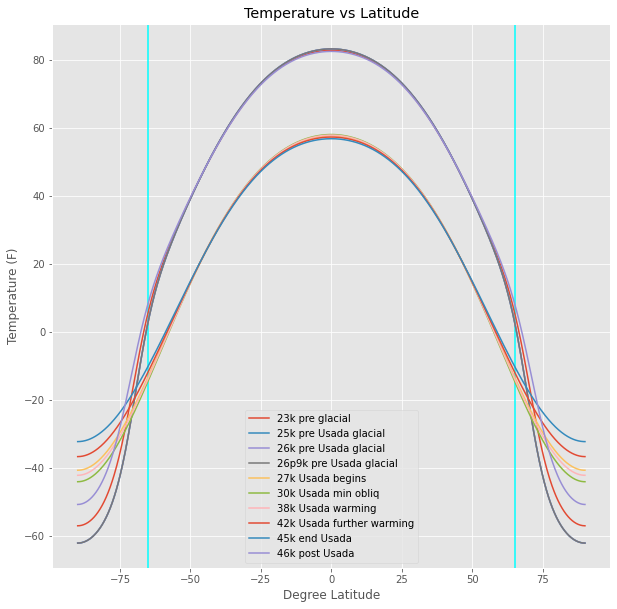

In [16]:
#Create a plot of Temperature vs Lat
t = np.linspace(0,1e5,1000)
plt.figure(figsize=[10,10])
plt.axvline(65,color='cyan')
plt.axvline(-65,color='cyan')
ind_of_65 = np.where(latitude_d > 65)
ind_of_n65 = np.where(latitude_d > -65)

# look at: 23000 ng (pre-blue region)
# 25000 ng (pre usada glacial)
# 27000 g (usada start glacial)
# 30000 g (usada min obliquity)
# 38000 g (usada non blue region)
# 42000 g (late usada rising temps)
# 45000 g (end usada high temps)
# 46000 ng (after usada high temps)
T_23k = CtoF(KtoC(temp_from_insolation(Ibar(t[230],latitude_r),temp_0D(Ibar(t[230],latitude_r)),gamma_ng)))
T_25k = CtoF(KtoC(temp_from_insolation(Ibar(t[250],latitude_r),temp_0D(Ibar(t[250],latitude_r)),gamma_ng)))
T_26k = CtoF(KtoC(temp_from_insolation(Ibar(t[260],latitude_r),temp_0D(Ibar(t[260],latitude_r)),gamma_ng)))
T_26p9k = CtoF(KtoC(temp_from_insolation(Ibar(t[269],latitude_r),temp_0D(Ibar(t[269],latitude_r)),gamma_ng)))

T_27k = CtoF(KtoC(temp_from_insolation(Ibar(t[270],latitude_r),temp_0D(Ibar(t[270],latitude_r)),gamma_g)))
T_30k = CtoF(KtoC(temp_from_insolation(Ibar(t[300],latitude_r),temp_0D(Ibar(t[300],latitude_r)),gamma_g)))
T_38k = CtoF(KtoC(temp_from_insolation(Ibar(t[380],latitude_r),temp_0D(Ibar(t[380],latitude_r)),gamma_g)))
T_42k = CtoF(KtoC(temp_from_insolation(Ibar(t[420],latitude_r),temp_0D(Ibar(t[420],latitude_r)),gamma_g)))
T_45k = CtoF(KtoC(temp_from_insolation(Ibar(t[450],latitude_r),temp_0D(Ibar(t[450],latitude_r)),gamma_g)))

T_46k = CtoF(KtoC(temp_from_insolation(Ibar(t[460],latitude_r),temp_0D(Ibar(t[460],latitude_r)),gamma_ng)))

print("Temperature at 65 lat, 23k: ",T_23k[ind_of_65[0][0]])
print("Temperature at 65 lat, 25k: ",T_25k[ind_of_65[0][0]])
print("Temperature at 65 lat, 26k: ",T_26k[ind_of_65[0][0]])
print("Temperature at 65 lat, 26p9k: ",T_26p9k[ind_of_65[0][0]])


print("Temperature at 65 lat, 27k early Usada: ",T_27k[ind_of_65[0][0]])
print("Temperature at 65 lat, 30k Usada min ob: ",T_30k[ind_of_65[0][0]])
print("Temperature at 65 lat, 38k Usada warming: ",T_38k[ind_of_65[0][0]])
print("Temperature at 65 lat, 42k Usada further warming: ",T_42k[ind_of_65[0][0]])
print("Temperature at 65 lat, 45k Usada ending: ",T_45k[ind_of_65[0][0]])
print("Temperature at 65 lat, 46k post Usada: ",T_46k[ind_of_65[0][0]])

print("\nTemperature at 65 lat, present: ",temp_at_present[ind_of_65[0][0]])
Tlist = [temp_at_present[ind_of_65[0][0]] - T_23k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_25k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_26k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_26p9k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_27k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_30k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_38k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_42k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_45k[ind_of_65[0][0]],
        temp_at_present[ind_of_65[0][0]] - T_46k[ind_of_65[0][0]]]

# #First major event: Usada blocks the sky with storms and dust, cooling globe and creating milder latitudinal changes
# print("\n Temperature falls drastically because of the Usada.")
# print("Temperature at 65 lat, min obliquity Usada: ",
#       temp_at_min_ob_glacial[ind_of_65[0][0]])
# #Comparison of temperatures during Usada max and present
# print("\n Temperature during the Usada comparisons:")
# print("Temperature at 65 lat, difference present vs Usada: ",
#       temp_at_min_ob_glacial[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])
# #After the Usada's dust is captured by Hundie and Insulo the temperature begins to drastically change. Here's the temperature
# #comparitive to the temperature during the Usada
# print("\n Temperature after the Usada rises significantly:")
# print("Temperature at 65 lat, difference Usada vs max: ",
#       temp_at_max_ob[ind_of_65[0][0]]-temp_at_min_ob_glacial[ind_of_65[0][0]])
# #Temperature after Usada compared to present (take this with some salt)
# print("\n Temperature at 65 lat, difference present vs max: ",
#       temp_at_max_ob[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])
# #The next major event is the glacial period just before the coming of man.
# #Here's the comparitive temp then from the present
# print("\n Temperature eventually cools and brings another glacial period:")
# print("Temperature at 65 lat, difference present vs min: ",
#       temp_at_min_ob[ind_of_65[0][0]]-temp_at_present[ind_of_65[0][0]])

plt.plot(latitude_d,T_23k,label='23k pre glacial')
plt.plot(latitude_d,T_25k,label='25k pre Usada glacial')
plt.plot(latitude_d,T_25k,label='26k pre Usada glacial')
plt.plot(latitude_d,T_25k,label='26p9k pre Usada glacial')

plt.plot(latitude_d,T_27k,label='27k Usada begins')
plt.plot(latitude_d,T_30k,label='30k Usada min obliq')
plt.plot(latitude_d,T_38k,label='38k Usada warming')
plt.plot(latitude_d,T_42k,label='42k Usada further warming')
plt.plot(latitude_d,T_45k,label='45k end Usada')
plt.plot(latitude_d,T_46k,label='46k post Usada')

plt.xlabel('Degree Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude')
plt.legend(loc='best')

## Max and Min Temperatures

In [17]:
#Let's see what we get from this model of insolation
#Output the maximum and minimum temperatures in C.
T_max_peryear = -10000
T_min_peryear = 10000
T_adj = 0
for i in range(0,len(t)):
    T_adj = (temp_from_insolation(Ibar(t[i],latitude_r),temp_0D(Ibar(t[i],latitude_r)),gamma_ng ))
    
    if KtoF(max(T_adj)) > T_max_peryear:
        T_max_peryear = KtoF(max(T_adj))
    if KtoF(min(T_adj)) < T_min_peryear:
        T_min_peryear = KtoF(min(T_adj))

print("Maximum temperature: ",T_max_peryear)
print("Minimum temperature: ",T_min_peryear)

Maximum temperature:  84.37418809685698
Minimum temperature:  -71.0776264153627


## True Average Temperature, Global

In [18]:
rad_nuinen_meters = 6577389 #radius of nuinen in meters
surface_area_nuinen = 4*np.pi*rad_nuinen_meters**2
latitude_area = lambda lat_f,lat_i,radius: (2*np.pi*radius**2)*(np.sin(lat_f)-np.sin(lat_i))

#AVERAGE TEMPERATURE, CORRECTLY CALCULATED
def average_global(gamma):
    #Create a plot of Temperature vs Lat
    temp_vs_lat = KtoF(temp_from_insolation(Ibar(t[0],latitude_r),temp_0D(Ibar(t[0],latitude_r)),gamma))
    straight_avg = np.mean(temp_vs_lat)
    #print("Straight average: ",straight_avg)
    #plt.plot(latitude_d,temp_vs_lat)

    norm_avg_T_t = []
    #for i in range(0,1000):
    weighted_temps = []
    for i in range(0,len(latitude_r)):
        T_mean = KtoF(temp_from_insolation(Ibar(t[i],latitude_r[i]),temp_0D(Ibar(t[i],latitude_r[i])),gamma ))
        if i < 999:
            percent_weight = (latitude_area(latitude_r[i+1],latitude_r[i],rad_nuinen_meters)/surface_area_nuinen)
        if i == 999:
            percent_weight = (latitude_area(rads*90,latitude_r[i],rad_nuinen_meters)/surface_area_nuinen)
        weighted_temps.append(T_mean*percent_weight)

    normalized_avg_T = np.sum(weighted_temps)
    return normalized_avg_T
    #print("True average: ",normalized_avg_T)

In [19]:
print("Average global temps, nonglacial: ",average_global(gamma_ng))
print("Average global temps, Usada gamma: ",average_global(gamma_g))
print("Average global temps, Usada-nonglacial: ",average_global(gamma_g)-average_global(gamma_ng))
print("Average global temps, Usada-nonglacial: ",average_global(gamma_pseudo_g)-average_global(gamma_ng))


Average global temps, nonglacial:  56.738261030570044
Average global temps, Usada gamma:  33.459677137021515
Average global temps, Usada-nonglacial:  -23.27858389354853
Average global temps, Usada-nonglacial:  -5.124016538640305


## True Average Temperature below 65 degrees S

In [20]:
def average_polar(gamma,year):
    weighted_temps_poles = []
    surface_area_poles = latitude_area(rads*90,rads*65,rad_nuinen_meters)
    year_index = np.where(t > year)
    for i in range(0,ind_of_n65[0][0]):
        T_mean = KtoF(temp_from_insolation(Ibar(t[year_index[0][0]],latitude_r[i]),temp_0D(Ibar(t[year_index[0][0]],latitude_r[i])),gamma))
        if i < 999:
            percent_weight = (latitude_area(latitude_r[i+1],latitude_r[i],rad_nuinen_meters)/surface_area_poles)
        if i == 999:
            percent_weight = (latitude_area(rads*90,latitude_r[i],rad_nuinen_meters)/surface_area_poles)
        weighted_temps_poles.append(T_mean*percent_weight)

    normalized_avg_T_poles = np.sum(weighted_temps_poles)
    return normalized_avg_T_poles

In [21]:
print("Average polar temperature present (F): ",average_polar(gamma_ng,99900))
print("Average polar temperature Usada (F): ",average_polar(gamma_g,Usada_date))
print("Average polar temperature difference (F): ",average_polar(gamma_g,Usada_date)-average_polar(gamma_ng,99900))

LGMdate = 74000
print("\n\n Average polar temperature last glacial maximum (F): ",average_polar(gamma_ng,LGMdate))
print("Average polar temperature difference (F): ",average_polar(gamma_ng,LGMdate)-average_polar(gamma_ng,99900))


Average polar temperature present (F):  -17.336725242489855
Average polar temperature Usada (F):  -29.093304701273397
Average polar temperature difference (F):  -11.756579458783541


 Average polar temperature last glacial maximum (F):  -42.09315850973046
Average polar temperature difference (F):  -24.756433267240602


## 3D Insolation Visuals

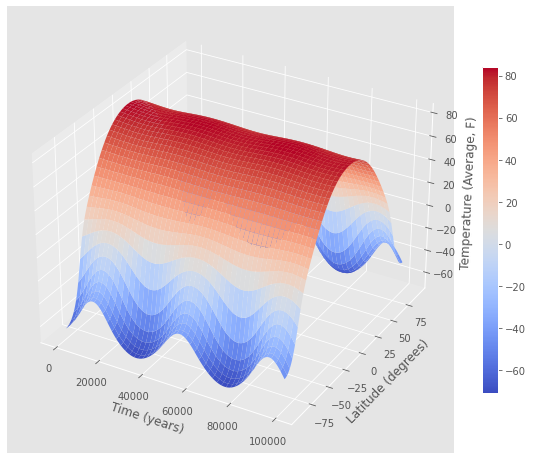

In [22]:
#Create a plot of insolation due to obliquity vs. time
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')

t = np.linspace(0,1e5,1000)
X = t
Y = latitude_d
Xm, Ym = np.meshgrid(X, Y)
Z = CtoF(KtoC(temp_from_insolation(Ibar(Xm,Ym*rads),temp_0D(Ibar(Xm,Ym*rads)),gamma_ng)))

ax.set_xlabel('Time (years)')
ax.set_ylabel('Latitude (degrees)')
ax.set_zlabel('Temperature (Average, F)')


##AXIS SCALING
# x_scale=1
# y_scale=1
# z_scale=1

# scale=np.diag([x_scale, y_scale, z_scale, 1.0])
# scale=scale*(1.0/scale.max())
# scale[3,3]=1.0

# def short_proj():
#   return np.dot(Axes3D.get_proj(ax), scale)

# ax.get_proj=short_proj
color_map = plt.cm.get_cmap('coolwarm') #Spectral or coolwarm or nipy_spectral
#reversed_color_map = color_map.reversed()
reversed_color_map = color_map
surf = ax.plot_surface(Xm, Ym, Z,cmap=reversed_color_map) #best cmaps are coolwarm and Spectral
fig.colorbar(surf,shrink=0.6)

<ipython-input-21-02b6c148ecc2>:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = fig.colorbar(CS, shrink=0.8, extend='both')
<ipython-input-21-02b6c148ecc2>:35: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = fig.colorbar(CS, shrink=0.8, extend='both')


Text(0.5, 1.0, 'Temperature during Usada')

<Figure size 432x288 with 0 Axes>

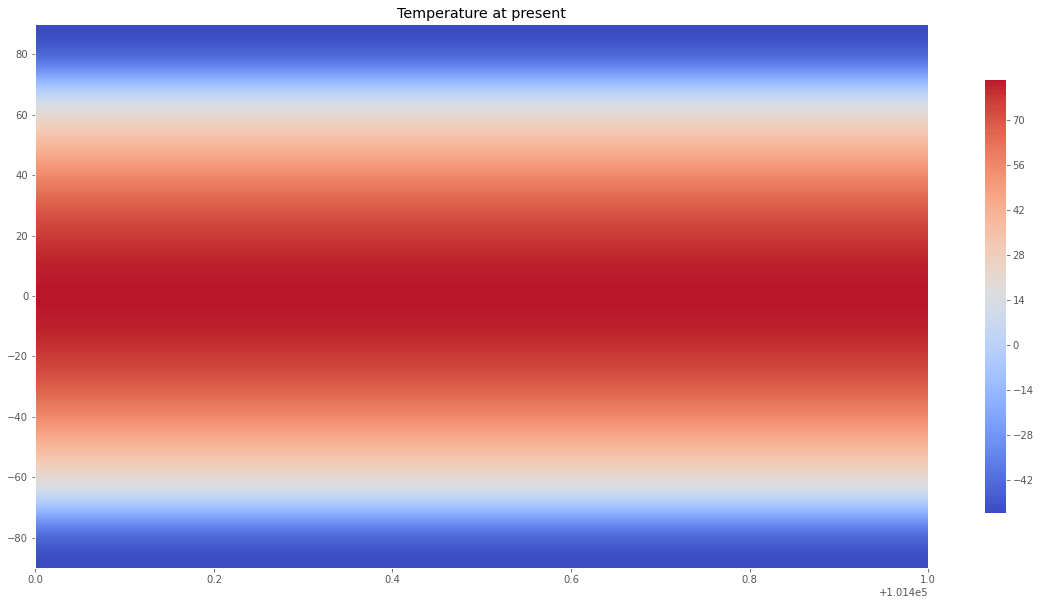

<Figure size 432x288 with 0 Axes>

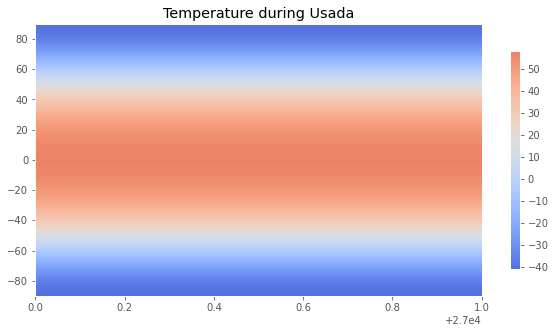

In [21]:
##PRESENT
res = 300
year = 101400
t_plot = np.linspace(year,year+1,100)
X = t_plot
Y = latitude_d
Xm, Ym = np.meshgrid(X, Y)
Z = KtoF(temp_from_insolation(Ibar(Xm,Ym*rads),temp_0D(Ibar(Xm,Ym*rads)),gamma_ng))

#_min, _max = np.amin(Z), np.amax(Z) #overall coverage, scaled min to max
#_min,_max = 32,np.amax(Z) #highlight the areas above and below freezing
_min,_max = np.amin(Z),85 #preference

plt.figure()
fig,ax = plt.subplots(figsize=[20,10])
color_map = plt.cm.get_cmap('coolwarm') #nipy_spectral or Spectral or coolwarm
#reversed_color_map = color_map.reversed()
reversed_color_map = color_map
CS = ax.contourf(X,Y,Z,res,cmap=reversed_color_map,vmin=_min,vmax=_max)
#ax.clabel(CS, inline=0, fontsize=10)
CB = fig.colorbar(CS, shrink=0.8, extend='both')
plt.title("Temperature at present")

year = 27000
t_plot = np.linspace(year,year+1,100)
X = t_plot
Y = latitude_d
Xm, Ym = np.meshgrid(X, Y)
Z = KtoF(temp_from_insolation(Ibar(Xm,Ym*rads),temp_0D(Ibar(Xm,Ym*rads)),gamma_g))

plt.figure()
fig,ax = plt.subplots(figsize=[10,5])
CS = ax.contourf(X,Y,Z,res,cmap=reversed_color_map,vmin=_min,vmax=_max)
#ax.clabel(CS, inline=0, fontsize=10)
CB = fig.colorbar(CS, shrink=0.8, extend='both')
plt.title("Temperature during Usada")

In [22]:
#Average temperature on Earth in 1890: 13.75 C, 286.9 K
#Average temperature on Nuinen with low obliquity and low eccentricity: 13.75 C, 286.9 K

#Habitable Zone bounds: inner = 340 K, outer = 273 K  surface temperatures
#Earth's albedo is 0.3

#Need: Luminosity, Radius, and Effective Temperature of the star
Ls = 1 #One stellar luminosity
Rs = 696.34e6 #radius of the sun is 696 million meters
Ts = 5777 #K
Lsun = 1 #Luminosity of the sun
L = Ls/Lsun #ratio of luminosities

d = 149.6e9 #distance of the planet from the star, Earth-Sun is 149 billion meters
eps = 1 #broadband thermal emmisivity
sigma = 5.67e-8 #Steffan Boltzmann constant; Watt / (meter^2 K^4)
A = 0.3 #planetary albedo

F = 1362 #watts / m^2
G = 158 #watts / m^2, the greenhouse constant non-normalized

#T0 = 278.5 K , avg temp of earth with no albedo
# Teq = T0 * ((((1-A)*L)/(B*eps*a**2))**(1/4))*(1 - (1/16)*ecc**2 - (15/1024)*ecc**4)

# GLACIAL STUDY

In [57]:
rho_sea_water = 1027 #kg / m3
rho_ice = 916.7 #kg / m3
water_to_ice = rho_sea_water/rho_ice

miles3_meters3 = 4.168e9 #cubic miles to cubic meters
km3_meters3 = 1e9
miles2_meters2 = 2.59e6 #square miles to square meters
km2_meters2 = 1e6

#Antarctica has 27e6 cubic miles of glacial ice today
#Greenland has 12% of that. Combined, these have approximitely 99.5% of all frozen water
#Sea ice is typically seasonal, though the north pole sea ice is thick enough to withstand seasonal melts

#vol_water_in_ice = 5.77e6*miles3_meters3 #cubic meters of water stored in glacial ice
#vol_ice = (vol_water_in_ice*water_to_ice) #volume of all glacial ice
vol_ice = (27e6+3.24e6)*km3_meters3 #in cubic meters
print("Volume of ice on Earth (meters^3):", vol_ice)

#Antarctica's land ice covers 42.338e6 km^2
#Greenland's land ice covers 2.16 km^2
area_ice = (42.338e6 + 2.16e6)*km2_meters2 #square meters of ice
print("Area of ice on Earth (meters^2):",area_ice)

#Average thickness of Antarctica's ice is 2100 meters
#Average thickness of Greenland's ice is 1500 meters
#avg_ice_thickness = vol_ice / area_ice #average thickness of ice on Earth in meters
#print(avg_ice_thickness)
area_ice_per_volume = area_ice / vol_ice #In (meters^2) / (meters^3)

print("average glacial area per cubic meter (meters^2 / meters^3)", area_ice_per_volume)

Volume of ice on Earth (meters^3): 3.024e+16
Area of ice on Earth (meters^2): 44498000000000.0
average glacial area per cubic meter (meters^2 / meters^3) 0.001471494708994709


In [58]:
rad_earth = 6371e3 #radius of earth is 6378 km
rad_nuinen_meters = 6577389 #radius of nuinen in meters
surface_area_earth = 4*np.pi*rad_earth**2 #surface area in m^2
surface_area_nuinen = 4*np.pi*rad_nuinen_meters**2

#sea level was 120 m lower than today during last glacial maximum
#average ocean depth today is 3688 m
ocean_depth_today = 3688 #avg ocean depth in meters
ocean_depth_iceage = ocean_depth_today - 120

# 71% of Earth's surface today is water, which means
vol_earth_oceans_today = surface_area_earth*0.71*ocean_depth_today #in meters^3
vol_earth_oceans_iceage = surface_area_earth*0.70*ocean_depth_iceage #in meters^3

#volume of ice gained during the last ice age in meters^3
vol_new_ice = (vol_earth_oceans_today-vol_earth_oceans_iceage)*water_to_ice 
print(vol_new_ice/miles3_meters3) #cubic miles

16572767.111023774


In [59]:
#average temp during ice age was 12 degrees F colder than today
#average temp in 1990 was 57.76
avg_temp_today = 57.76 #in F
avg_temp_iceage = avg_temp_today - 12 #in F
temp_difference = 12 #in F
vol_ice_per_degree_change = vol_new_ice/12 #in meters^3 / degree F

area_per_degree = (vol_ice_per_degree_change)*area_ice_per_volume #in square meters
print("square miles of glacial ice formed for each degree F drop: ",
      area_per_degree/miles2_meters2)


square miles of glacial ice formed for each degree F drop:  3270396.6744142184


In [60]:
pole = np.pi/2

#A = (2*np.pi*R**2)*(np.sin(pole) - np.sin(initial))
reach_total = lambda area,radius: (180/np.pi)*np.arcsin(np.sin(pole)-(area/(2*np.pi*radius**2)))
reach_per_pole = lambda area,radius: (180/np.pi)*np.arcsin(1-((area/2)/(2*np.pi*radius**2)))

# Front end of glaciation:

In [62]:
rad_earth_meters = 6.371e6 #radius of earth in meters, 6.371 million meters
rad_nuinen_meters = 6577389 #radius of nuinen in meters
degree_off = 5.5


#print("Total reach, latitude",reach_total((area_ice+area_per_degree*12)*0.9,rad_nuinen_meters))
print("Reach per pole, latitude",reach_per_pole((area_ice+area_per_degree*degree_off)*0.70,rad_earth_meters))
print("Percent of the planet covered by ice",(area_ice+area_per_degree*degree_off)/surface_area_earth)
print("Sea level drop (m)",(((area_per_degree*degree_off)/area_ice_per_volume)/water_to_ice)/(surface_area_earth*0.66))

Reach per pole, latitude 61.044673655635634
Percent of the planet covered by ice 0.17857507362939817
Sea level drop (m) 83.9444444444444


In [28]:
rad_earth_meters = 6.371e6 #radius of earth in meters, 6.371 million meters
rad_nuinen_meters = 6577389 #radius of nuinen in meters
degree_off = 40


#print("Total reach, latitude",reach_total((area_ice+area_per_degree*12)*0.9,rad_nuinen_meters))
print("Reach per pole, latitude",reach_per_pole((area_ice+area_per_degree*degree_off)*0.70,rad_nuinen_meters))
print("Percent of the planet covered by ice",(area_ice+area_per_degree*degree_off)/surface_area_nuinen)
print("Sea level drop (m)",(((area_per_degree*degree_off)/area_ice_per_volume)/water_to_ice)/(surface_area_nuinen*0.66))

Reach per pole, latitude 30.427551652385084
Percent of the planet covered by ice 0.7050736285690178
Sea level drop (m) 572.7926227958292


In [29]:
latitudes = []
sea_levels = []
for i in range(0,len(Tlist)):
    print(Tlist[i])
    print("Reach per pole, latitude",reach_per_pole((area_ice+area_per_degree*Tlist[i])*0.70,rad_nuinen_meters))
    print("Percent of the planet covered by ice",(area_ice+area_per_degree*Tlist[i])/surface_area_nuinen)
    print("Sea level drop (m)",(((area_per_degree*Tlist[i])/area_ice_per_volume)/water_to_ice)/(surface_area_nuinen*0.66))
    print("\n\n")
    
    latitudes.append(reach_per_pole((area_ice+area_per_degree*Tlist[i])*0.70,rad_nuinen_meters))
    sea_levels.append((((area_per_degree*Tlist[i])/area_ice_per_volume)/water_to_ice)/(surface_area_nuinen*0.66))

3.6963382797230437
Reach per pole, latitude 64.47410494102385
Percent of the planet covered by ice 0.13944197007821418
Sea level drop (m) 52.930882449579634



6.546900802354266
Reach per pole, latitude 60.61020742157163
Percent of the planet covered by ice 0.18385535239019893
Sea level drop (m) 93.75041204411545



7.94219589280317
Reach per pole, latitude 58.87965437731029
Percent of the planet covered by ice 0.20559484198151692
Sea level drop (m) 113.73078040492473



9.132035894387144
Reach per pole, latitude 57.46965285891479
Percent of the planet covered by ice 0.22413322465542612
Sea level drop (m) 130.76906978529166



22.497039957396755
Reach per pole, latitude 44.21419514381897
Percent of the planet covered by ice 0.43236757501226897
Sea level drop (m) 322.1534630584964



23.681079177352938
Reach per pole, latitude 43.19072525239729
Percent of the planet covered by ice 0.4508155782154253
Sea level drop (m) 339.1086863157921



23.015093928577965
Reach per pole, latitude 43.7

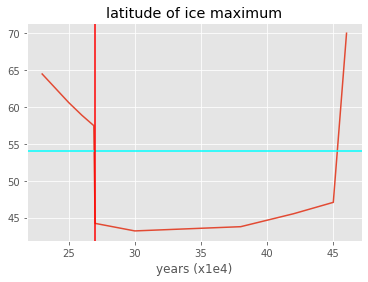

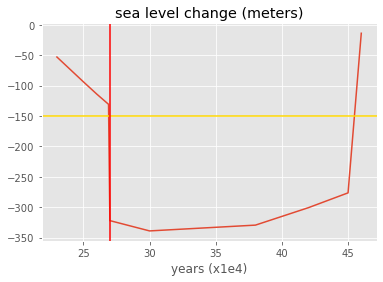

In [30]:
# look at: 23000 ng (pre-blue region)
# 25000 ng (pre usada glacial)
# 27000 g (usada start glacial)
# 30000 g (usada min obliquity)
# 38000 g (usada non blue region)
# 42000 g (late usada rising temps)
# 45000 g (end usada high temps)
# 46000 ng (after usada high temps)
years=[23,25,26,26.9,27,30,38,42,45,46]
plt.figure()
latitudes[-1] = 70
plt.plot(years,latitudes)
plt.title("latitude of ice maximum")
plt.xlabel("years (x1e4)")
plt.axhline(54,color='cyan') #the actual latitude is 54, but the latitude is 8 degrees behind the average at glacial maximum
plt.axvline(27,color='red') #start of Usada

plt.figure()
plt.plot(years,-1*np.array(sea_levels))
plt.title("sea level change (meters)")
plt.xlabel("years (x1e4)")
plt.axhline(-150,color='gold') #average depth of the continental shelves
plt.axvline(27,color='red') #start of Usada

In [31]:
#Continental shelves vary greatly in width, but typically extend until the ocean depth is anywhere between 100-200
#meters. Some shelves are practically nonexistent, some stretch 1000 miles. The average width is 50 miles.
#After that point, the continental break drops off with a slope between 1 and 10 degrees.